16640


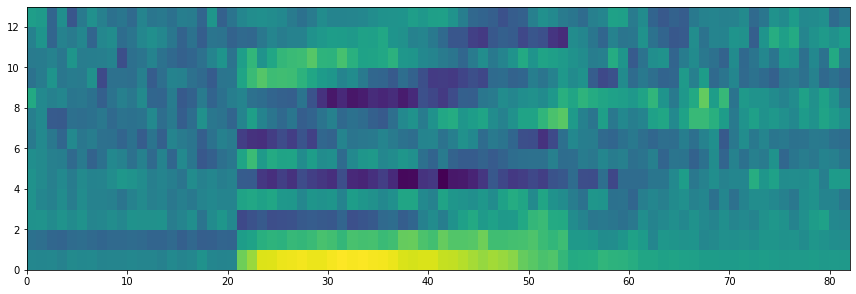

In [1]:
# MFCC test for lab2_data
import numpy as np
data = np.load('lab2_data.npz', allow_pickle=True)['data']
print(len(data[0]["samples"]))

import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from lab1 import lab1_proto
data_lmfcc1 = lab1_proto.mfcc(data[0]['samples'], 0.02, 0.01)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.pcolormesh(data_lmfcc1.T, shading='auto')
plt.tight_layout()
plt.show()

In [2]:
phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
list(sorted(phoneHMMs.keys()))

['ah',
 'ao',
 'ay',
 'eh',
 'ey',
 'f',
 'ih',
 'iy',
 'k',
 'n',
 'ow',
 'r',
 's',
 'sil',
 'sp',
 't',
 'th',
 'uw',
 'v',
 'w',
 'z']

In [3]:
phoneHMMs['ah'].keys()

dict_keys(['name', 'startprob', 'transmat', 'means', 'covars'])

In [4]:
prondict = {} 
prondict['o'] = ['ow']
prondict['z'] = ['z', 'iy', 'r', 'ow']
prondict['1'] = ['w', 'ah', 'n']
prondict['2'] = ['t', 'uw']
prondict['3'] = ['th', 'r', 'iy']
prondict['4'] = ['f', 'ao', 'r']
prondict['5'] = ['f', 'ay', 'v']
prondict['6'] = ['s', 'ih', 'k', 's']
prondict['7'] = ['s', 'eh', 'v', 'ah', 'n']
prondict['8'] = ['ey', 't']
prondict['9'] = ['n', 'ay', 'n']
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']
print(isolated)

{'o': ['sil', 'ow', 'sil'], 'z': ['sil', 'z', 'iy', 'r', 'ow', 'sil'], '1': ['sil', 'w', 'ah', 'n', 'sil'], '2': ['sil', 't', 'uw', 'sil'], '3': ['sil', 'th', 'r', 'iy', 'sil'], '4': ['sil', 'f', 'ao', 'r', 'sil'], '5': ['sil', 'f', 'ay', 'v', 'sil'], '6': ['sil', 's', 'ih', 'k', 's', 'sil'], '7': ['sil', 's', 'eh', 'v', 'ah', 'n', 'sil'], '8': ['sil', 'ey', 't', 'sil'], '9': ['sil', 'n', 'ay', 'n', 'sil']}


In [5]:
from lab2_proto import *
wordHMMs = {}
wordHMMs['o'] = concatHMMs(phoneHMMs, isolated['o'])
print(wordHMMs['o'])

{'startprob': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'transmat': array([[0.8833106 , 0.1166894 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9164465 , 0.08355348, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.802877  , 0.197123  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.8148277 , 0.1851723 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8436188 ,
        0.1563813 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8662466 , 0.1337534 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8833106 , 0.1

In [6]:
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()
list(example.keys())

['filename',
 'samplingrate',
 'gender',
 'speaker',
 'digit',
 'repetition',
 'samples',
 'lmfcc',
 'obsloglik',
 'logalpha',
 'loglik',
 'vloglik',
 'vpath',
 'logbeta',
 'loggamma']

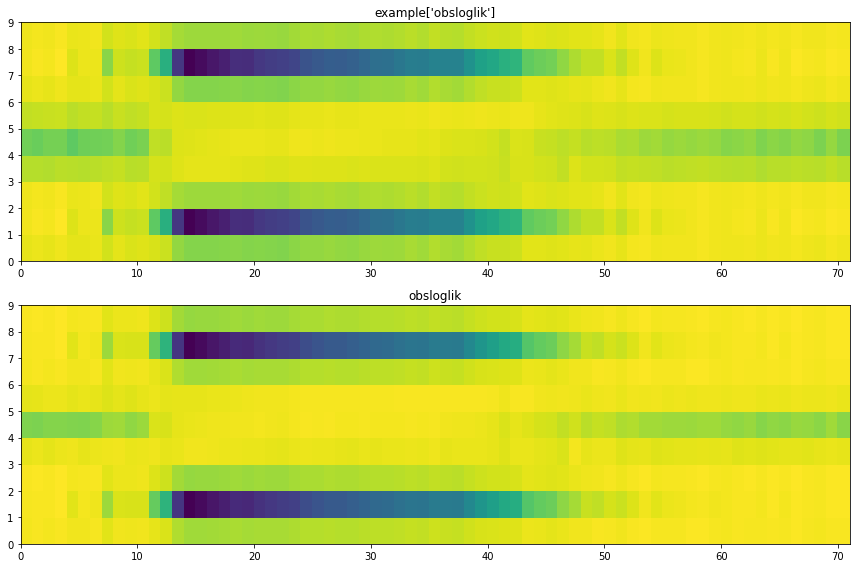

In [7]:
# Compare example['obsloglik'] and log_multivariate_normal_density_diag function on example['lmfcc']
def plot_comparison(example_, function_, title1="given example", title2="test data", figsize=(12, 8)):
    plt.figure(figsize=figsize)
    plt.subplot(2, 1, 1)
    plt.pcolormesh(example_.T, shading="auto")
    plt.title(title1)
    plt.subplot(2, 1, 2)
    plt.pcolormesh(function_.T, shading="auto")
    plt.title(title2)
    plt.tight_layout()
    plt.show()
    
obsloglik = log_multivariate_normal_density_diag(
    example['lmfcc'], 
    wordHMMs['o']['means'], 
    wordHMMs['o']['covars']
)
plot_comparison(obsloglik, example['obsloglik'], "example['obsloglik']", 'obsloglik')

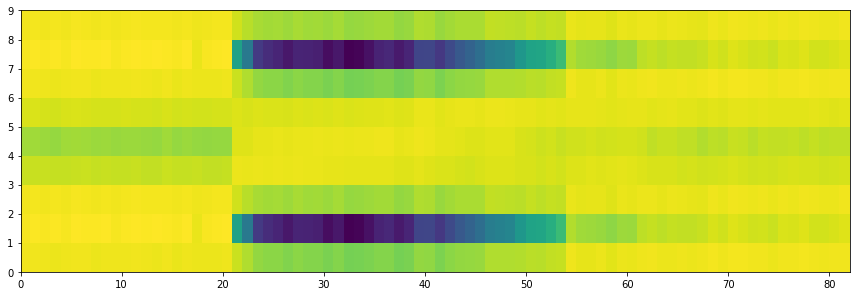

In [8]:
# test on lab2_data[0]
test_obsloglik = log_multivariate_normal_density_diag(
    data[0]['lmfcc'], 
    wordHMMs['o']['means'], 
    wordHMMs['o']['covars']
)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.pcolormesh(test_obsloglik.T, shading='auto')
plt.tight_layout()
plt.show()

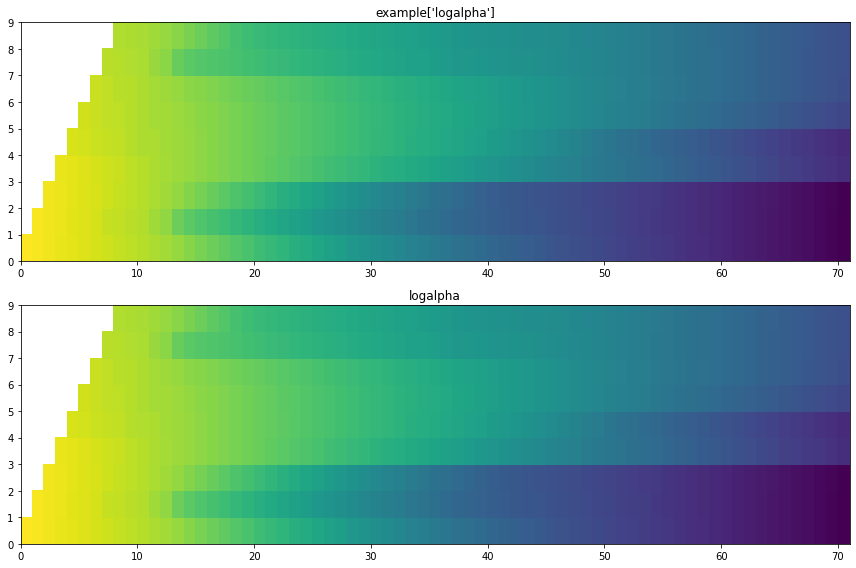

In [9]:
# Forward Algorithm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

logalpha = forward(
    example['obsloglik'], 
    np.log(wordHMMs['o']['startprob']), 
    np.log(wordHMMs['o']['transmat'])
)
plot_comparison(logalpha, example['logalpha'], "example['logalpha']", 'logalpha')

In [10]:
# All 44 utterances for 'o'
forward_results_o = {}
for digit in wordHMMs.keys():
    forward_results_o[digit] = []
    for i in range(len(data)):
        obsloglik = log_multivariate_normal_density_diag(
            data[i]['lmfcc'],
            wordHMMs[digit]['means'],
            wordHMMs[digit]['covars']
        )
        log_alpha = forward(obsloglik, 
                           np.log(wordHMMs[digit]['startprob']), 
                           np.log(wordHMMs[digit]['transmat']))
        log_likelihood = logsumexp(log_alpha[-1])
        forward_results_o[digit].append(log_likelihood)
print(forward_results_o)

{'o': [-6475.9532328005425, -5821.031406882754, -8135.702275612531, -7710.770272578044, -6807.492587992901, -6987.2950438623075, -6189.102772948825, -7382.6899938944125, -7332.457496897426, -8121.2747757487505, -7070.173641433824, -7001.402773644119, -7504.141303861806, -6830.047610061745, -8168.063921600178, -8554.89535460972, -7592.099841270709, -7773.384313685573, -6507.526432077194, -6705.080666176452, -9174.52067960481, -7210.46540481803, -5809.268460746003, -6371.265310627375, -8695.287670675092, -7979.382410364697, -6626.61550181036, -5753.095969244252, -6692.71101294658, -5836.4885873090225, -7180.677413368165, -7027.373295050385, -6681.218945984549, -6725.245897417815, -8068.505181159469, -7573.665111455033, -9530.831974850387, -10217.834520390328, -8448.78176097314, -8096.547015776902, -6316.740242178752, -7307.676648894792, -7280.462663736659, -6709.359697158642]}


In [11]:
# All 44 utterances for each of the 11 HMM models with phoneHMMs_all
results_1 = {}
phoneHMMs_all = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
wordHMMs_all = {}
for digit in prondict.keys():
    wordHMMs_all[digit] = concatHMMs(phoneHMMs_all, isolated[digit])

for digit in wordHMMs_all.keys():
    results_1[digit] = []
    for i in range(len(data)):
        obsloglik = log_multivariate_normal_density_diag(
            data[i]['lmfcc'],
            wordHMMs_all[digit]['means'],
            wordHMMs_all[digit]['covars']
        )
        log_alpha = forward(obsloglik, 
                           np.log(wordHMMs_all[digit]['startprob']), 
                           np.log(wordHMMs_all[digit]['transmat']))
        log_likelihood = logsumexp(log_alpha[-1])
        results_1[digit].append(log_likelihood)

predictions = []
for i in range(len(data)):
    best_digit = None
    best_likelihood = float('-inf')
    for digit in wordHMMs_all.keys():
        if results_1[digit][i] > best_likelihood:
            best_likelihood = results_1[digit][i]
            best_digit = digit
    predictions.append(best_digit)

correct = sum(1 for i in range(len(data)) if predictions[i] == data[i]['digit'])
accuracy = correct / len(data)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [12]:
# All 44 utterances for each of the 11 HMM models with phoneHMMs_onespkr
results_2 = {}
phoneHMMs_onespkr = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
wordHMMs_onespkr = {}
for digit in prondict.keys():
    wordHMMs_onespkr[digit] = concatHMMs(phoneHMMs_onespkr, isolated[digit])

for digit in wordHMMs_onespkr.keys():
    results_2[digit] = []
    for i in range(len(data)):
        obsloglik = log_multivariate_normal_density_diag(
            data[i]['lmfcc'],
            wordHMMs_onespkr[digit]['means'],
            wordHMMs_onespkr[digit]['covars']
        )
        log_alpha = forward(obsloglik, 
                           np.log(wordHMMs_onespkr[digit]['startprob']), 
                           np.log(wordHMMs_onespkr[digit]['transmat']))
        log_likelihood = logsumexp(log_alpha[-1])
        results_2[digit].append(log_likelihood)

predictions = []
for i in range(len(data)):
    best_digit = None
    best_likelihood = float('-inf')
    for digit in wordHMMs_onespkr.keys():
        if results_2[digit][i] > best_likelihood:
            best_likelihood = results_2[digit][i]
            best_digit = digit
    predictions.append(best_digit)

correct = sum(1 for i in range(len(data)) if predictions[i] == data[i]['digit'])
accuracy = correct / len(data)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


example['vloglik']:  -5974.211288357338
vloglik:  -5974.237978685437


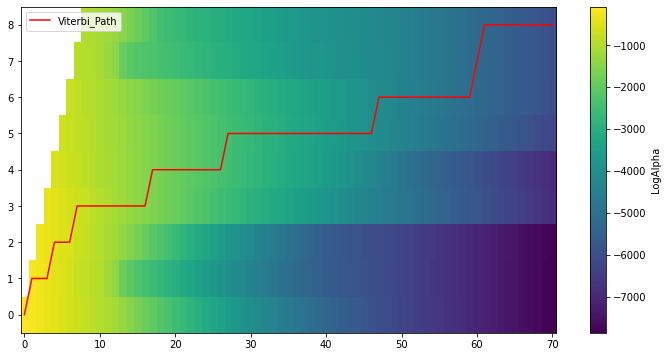

In [13]:
# Viterbi Approximation
viterbi_loglik, viterbi_path = viterbi(
    example['obsloglik'],
    np.log(wordHMMs['o']['startprob']),
    np.log(wordHMMs['o']['transmat']),
    forceFinalState=True
)
print("example['vloglik']: ", example['vloglik'])
print("vloglik: ", viterbi_loglik)

logalpha = forward(
    example['obsloglik'], 
    np.log(wordHMMs['o']['startprob']), 
    np.log(wordHMMs['o']['transmat'])
)
plt.figure(figsize=(12, 6))
plt.imshow(logalpha.T, aspect='auto', origin='lower')
plt.colorbar(label='LogAlpha')
plt.plot(viterbi_path, 'r-', label='Viterbi_Path')
plt.legend()
plt.show()

In [14]:
# All 44 utterances for each of the 11 HMM models with phoneHMMs_all
viterbi_results = {}
for digit in wordHMMs_all.keys():
    viterbi_results[digit] = []
    for i in range(len(data)):
        obsloglik = log_multivariate_normal_density_diag(
            data[i]['lmfcc'],
            wordHMMs_all[digit]['means'],
            wordHMMs_all[digit]['covars']
        )
        viterbi_loglik, _ = viterbi(
            obsloglik,
            np.log(wordHMMs_all[digit]['startprob']),
            np.log(wordHMMs_all[digit]['transmat']),
            forceFinalState=True
        )
        viterbi_results[digit].append(viterbi_loglik)

viterbi_predictions = []
for i in range(len(data)):
    best_digit = None
    best_likelihood = float('-inf')
    for digit in wordHMMs_all.keys():
        if viterbi_results[digit][i] > best_likelihood:
            best_likelihood = viterbi_results[digit][i]
            best_digit = digit
    viterbi_predictions.append(best_digit)

viterbi_correct = 0
for i in range(len(data)):
    if viterbi_predictions[i] == data[i]['digit']:
        viterbi_correct += 1
viterbi_accuracy = viterbi_correct / len(data)
print(f"Viterbi Accuracy: {viterbi_accuracy:.2f}")
print(f"Viterbi Mistakes: {len(data) - viterbi_correct}")

Viterbi Accuracy: 1.00
Viterbi Mistakes: 0


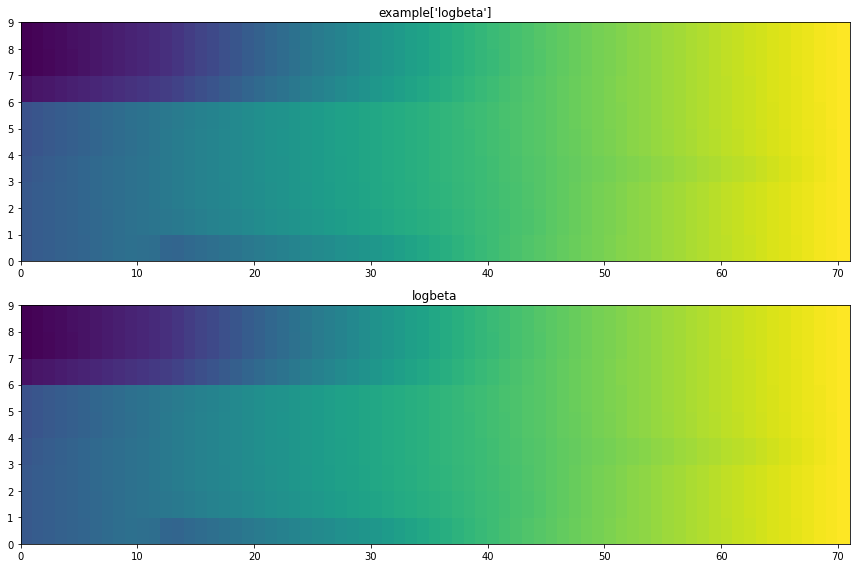

In [15]:
# Backward Algorithm
logbeta = backward(
    example['obsloglik'], 
    np.log(wordHMMs['o']['startprob']), 
    np.log(wordHMMs['o']['transmat'])
)
plot_comparison(logbeta, example['logbeta'], "example['logbeta']", 'logbeta')

In [29]:
# Compute P(X|θ) using the betas βn(i) instead of the alphas.
def compute_likelihood_from_betas(log_beta, log_startprob, log_emlik):
    log_probs = log_startprob[:-1] + log_emlik[0, :] + log_beta[0, :]
    log_likelihood = logsumexp(log_probs)
    return log_likelihood

logbeta_new = backward(
    example['obsloglik'],
    np.log(wordHMMs['o']['startprob']),
    np.log(wordHMMs['o']['transmat'])
)
beta_loglik = compute_likelihood_from_betas(
    logbeta_new,
    np.log(wordHMMs['o']['startprob']),
    example['obsloglik']
)
forward_loglik = logsumexp(example['logalpha'][-1])
print("Compute P(X|θ) using betas βn(i):", beta_loglik)
print("Compute P(X|θ) using alphas:", forward_loglik)

Compute P(X|θ) using betas βn(i): -5970.4419266684945
Compute P(X|θ) using alphas: -5970.427602563561


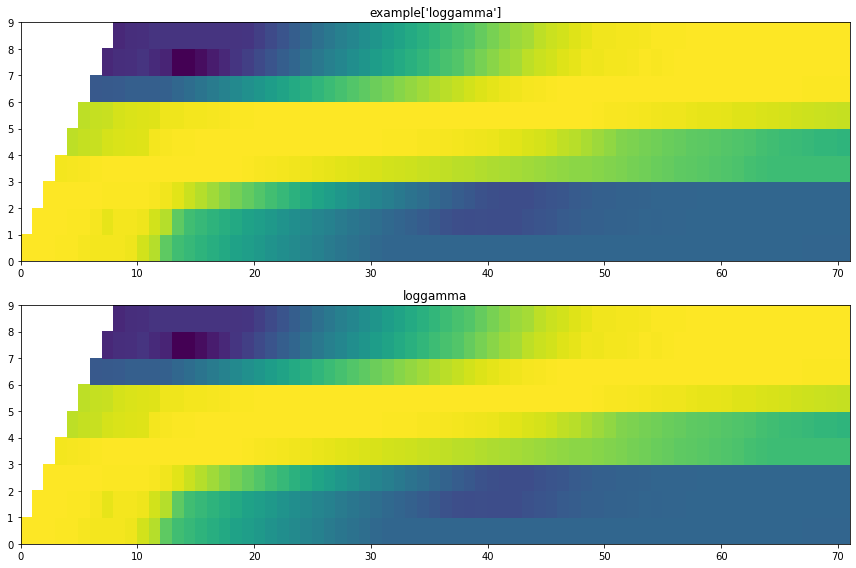

State posteriors sum of each time step:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
# State posterior probabilities
loggamma = statePosteriors(example['logalpha'], example['logbeta'])
plot_comparison(loggamma, example['loggamma'], "example['loggamma']", 'loggamma')

# state posteriors sum (in linear domain)
gamma_linear = np.exp(loggamma)
time_sum = np.sum(gamma_linear, axis=1)
print("State posteriors sum of each time step: ", time_sum)

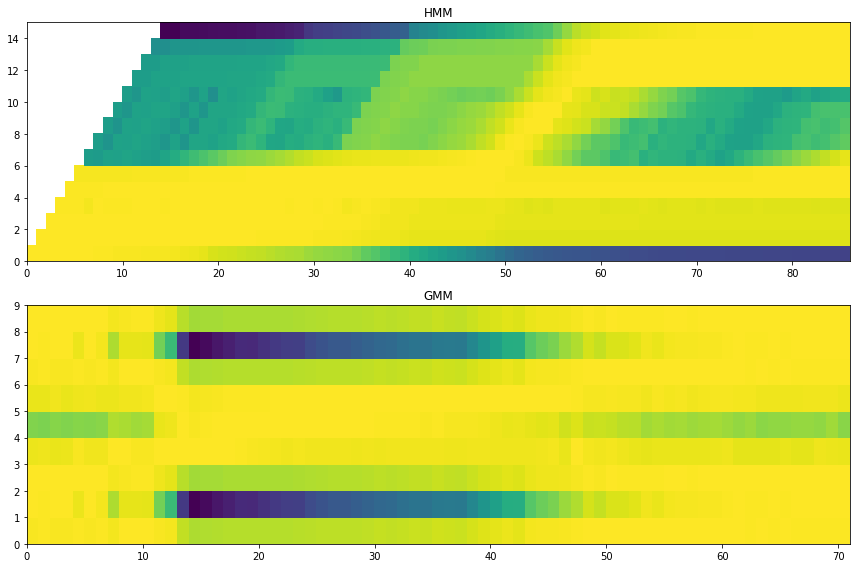

In [27]:
# HMM v.s. GMM
def gmm_posteriors(log_emlik):
    N, M = log_emlik.shape
    log_gamma_gmm = np.zeros((N, M))
    for n in range(N):
        normalizer = logsumexp(log_emlik[n, :])
        log_gamma_gmm[n, :] = log_emlik[n, :] - normalizer
    return log_gamma_gmm
log_gamma_gmm = gmm_posteriors(example['obsloglik'])

plot_comparison(loggamma, log_gamma_gmm, "HMM", 'GMM')

In [18]:
# HMM posteriors sum (in linear domain) for each state along the time axis
state_occupancy = np.sum(gamma_linear, axis=0)
print("State occupancy:", state_occupancy)
print("Sum of states:", np.sum(state_occupancy))
print("Sum of time stpes:", np.sum(time_sum))
print("Length of observation sequence:", len(example['lmfcc']))

State occupancy: [ 1.34597458  2.09555994  3.55849998  9.73752276 10.12040999 20.5329264
 12.9968938   1.20869929  9.40351326]
Sum of states: 71.00000000000163
Sum of time stpes: 71.00000000000162
Length of observation sequence: 71


Iteration 1: log_likelihood = -5994.05
Iteration 2: log_likelihood = -5994.05
Iteration ends.


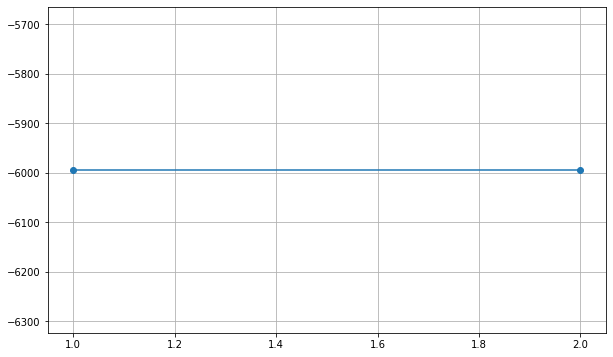

In [25]:
# Retraining the emission probability distributions
test_data = data[10]['lmfcc']
test_digit = data[10]['digit']
digit_model = wordHMMs_all[test_digit]
max_iterations = 20
threshold = 1.0
previous_log_likelihood = float('-inf')
likelihoods = []
for iteration in range(max_iterations):
    obsloglik = log_multivariate_normal_density_diag(
        test_data,
        digit_model['means'],
        digit_model['covars']
    )
    log_alpha = forward(
        obsloglik,
        np.log(digit_model['startprob']),
        np.log(digit_model['transmat'])
    )
    log_beta = backward(
        obsloglik,
        np.log(digit_model['startprob']),
        np.log(digit_model['transmat'])
    )
    log_gamma = statePosteriors(log_alpha, log_beta)
    current_log_likelihood = logsumexp(log_alpha[-1])
    likelihoods.append(current_log_likelihood)
    print(f"Iteration {iteration+1}: log_likelihood = {current_log_likelihood:.2f}")
    if iteration > 0:
        improvement = current_log_likelihood - previous_log_likelihood
        if improvement < threshold:
            print(f"Iteration ends.")
            break
    previous_log_likelihood = current_log_likelihood
    new_means, new_covars = updateMeanAndVar(test_data, log_gamma)
    digit_model['means'] = new_means
    digit_model['covars'] = new_covars

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(likelihoods)+1), likelihoods, 'o-')
plt.grid(True)
plt.show()

Starting from model 1 , Iterations: 11
Starting from model 2 , Iterations: 6
Starting from model 3 , Iterations: 5
Starting from model 4 , Iterations: 2
Starting from model 5 , Iterations: 6


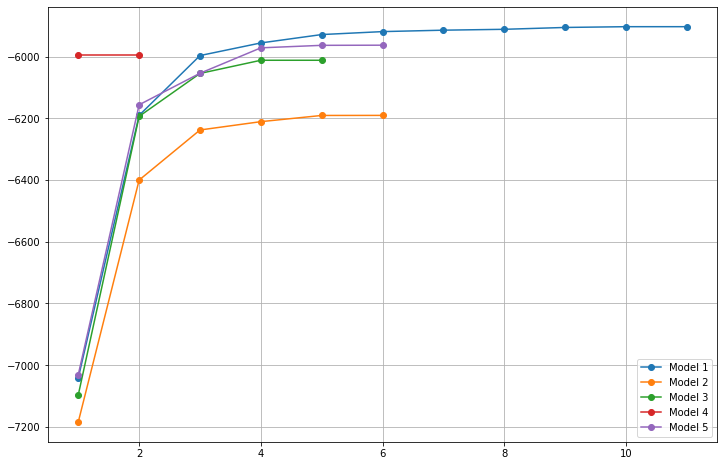

In [26]:
import copy
models_to_try = ['1', '2', '3', '4', '5']
all_likelihoods = {}
for start_digit in models_to_try:
    current_model = copy.deepcopy(wordHMMs_all[start_digit])
    max_iterations = 20
    threshold = 1.0
    previous_log_likelihood = float('-inf')
    model_likelihoods = []
    for iteration in range(max_iterations):
        obsloglik = log_multivariate_normal_density_diag(
            test_data,
            current_model['means'],
            current_model['covars']
        )
        logalpha = forward(obsloglik, np.log(current_model['startprob']), np.log(current_model['transmat']))
        logbeta = backward(obsloglik, np.log(current_model['startprob']), np.log(current_model['transmat']))
        loggamma = statePosteriors(logalpha, logbeta)
        current_log_likelihood = logsumexp(logalpha[-1])
        model_likelihoods.append(current_log_likelihood)
        if iteration > 0:
            improvement = current_log_likelihood - previous_log_likelihood
            if improvement < threshold:
                break
        previous_log_likelihood = current_log_likelihood
        new_means, new_covars = updateMeanAndVar(test_data, loggamma)
        current_model['means'] = new_means
        current_model['covars'] = new_covars
    all_likelihoods[start_digit] = model_likelihoods
    print(f"Starting from model {start_digit} , Iterations: {len(model_likelihoods)}")

plt.figure(figsize=(12, 8))
for digit, likelihoods in all_likelihoods.items():
    plt.plot(range(1, len(likelihoods)+1), likelihoods, 'o-', label=f'Model {digit}')
plt.legend()
plt.grid(True)
plt.show()